In [17]:
import numpy as np
from typing import Tuple
from scipy.stats import mode
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
def load_csv(csv_path) -> Tuple[np.ndarray, np.ndarray]:
    np.random.seed(42)
    dataset = np.genfromtxt(csv_path, delimiter=',')
    np.random.shuffle(dataset)
    x, y = dataset[:, :-1], dataset[:, -1]

    return x, y

In [3]:
x, y = load_csv('C:/bevadat/BEVADAT2022232/GYAK/GYAK05/iris.csv')
x.shape, y.shape

((150, 4), (150,))

In [4]:
np.mean(x, axis=0), np.var(y, axis=0)

(array([nan, nan, nan, nan]), 0.6666666666666666)

In [5]:
np.nanmean(x, axis=0), np.nanvar(x, axis=0)

(array([ 355.46503497, -280.09189189,    2.95      ,   21.74726027]),
 array([1.73561968e+07, 1.18405444e+07, 1.51049922e+04, 6.11729208e+04]))

In [6]:
x[np.isnan(x)] = 3.5 #hiányzó értékek lekezelése

In [7]:
y = np.delete(y, np.where(x < 0.0)[0], axis=0)
y = np.delete(y, np.where(x > 10.0)[0], axis=0)
x = np.delete(x, np.where(x < 0.0)[0], axis=0)
x = np.delete(x, np.where(x > 10.0)[0], axis=0)
x.shape, y.shape

((144, 4), (144,))

In [27]:
def train_set_split(features:np.ndarray, labels:np.ndarray, test_split_ratio:float) -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    test_size = int(len(features) * test_split_ratio)
    train_size = len(features) - test_size
    assert len(features) == test_size + train_size, 'Size mismatch!'

    x_train, y_train = features[:train_size, :], labels[:train_size]
    x_test, y_test = features[train_size:, :], labels[train_size:]

    return x_train, y_train, x_test, y_test

In [29]:
x_train, y_train, x_test, y_test = train_set_split(x,y,0.2)
x_train, y_train, x_test, y_test

(array([[6.1, 2.8, 4.7, 1.2],
        [5.7, 3.8, 1.7, 0.3],
        [7.7, 2.6, 6.9, 2.3],
        [6. , 2.9, 4.5, 1.5],
        [5.4, 3.4, 1.5, 0.4],
        [5.6, 2.9, 3.6, 1.3],
        [6.9, 3.1, 5.1, 2.3],
        [6.2, 2.2, 4.5, 1.5],
        [5.8, 2.7, 3.9, 1.2],
        [6.5, 3.2, 5.1, 2. ],
        [4.8, 3. , 1.4, 0.1],
        [5.5, 3.5, 3.5, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [6.3, 3.3, 4.7, 1.6],
        [6.5, 3. , 5.8, 2.2],
        [5.6, 2.5, 3.9, 1.1],
        [3.5, 2.8, 4.5, 3.5],
        [6.4, 3.5, 5.6, 2.2],
        [4.7, 3.2, 1.6, 0.2],
        [6.1, 3. , 4.9, 1.8],
        [5. , 3.4, 1.6, 0.4],
        [6.4, 2.8, 5.6, 2.1],
        [7.9, 3.8, 6.4, 2. ],
        [6.7, 3. , 5.2, 2.3],
        [6.7, 2.5, 5.8, 1.8],
        [4.8, 3.1, 1.6, 0.2],
        [4.6, 3.6, 1. , 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [6.7, 3.1, 4.4, 1.4],
        [3.5, 3.4, 1.6, 0.2],
        [4.4, 3.2, 1.3, 0.2],
        [6.3, 2.5, 5. , 1.9],
        [6.4, 3.2, 4.5, 1.5],
        [5

In [12]:
def euclidean(points:np.ndarray, element_of_x:np.ndarray) -> np.ndarray:
    return np.sqrt(np.sum((points - element_of_x)**2, axis=1))

In [20]:
def predict(x_train:np.ndarray, y_train:np.ndarray, x_test:np.ndarray, k:int) -> np.ndarray:
    labels_pred = []
    for x_test_element in x_test:
        distances = euclidean(x_train, x_test_element)
        distances = np.array(sorted(zip(distances, y_train)))

        label_pred = mode(distances[:k, 1], keepdims=False).mode
        labels_pred.append(label_pred)

    return np.array(labels_pred, dtype=np.int64)

In [21]:
y_preds = predict(x_train, y_train, x_test, 3)
y_preds

array([0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 1, 0, 1, 2, 2, 1, 2, 1, 1, 2,
       0, 1, 1, 0, 1, 2], dtype=int64)

In [22]:
def accuracy(y_test:np.ndarray, y_preds:np.ndarray) -> float:
    true_positive = (y_test == y_preds).sum()
    return true_positive / len(y_test) * 100

In [24]:
num = accuracy(y_test, y_preds)
num

89.28571428571429

In [25]:
def plot_confusion_matrix(y_test:np.ndarray, y_preds:np.ndarray):
    conf_matrix = confusion_matrix(y_test, y_preds)
    sns.heatmap(conf_matrix, annot=True)

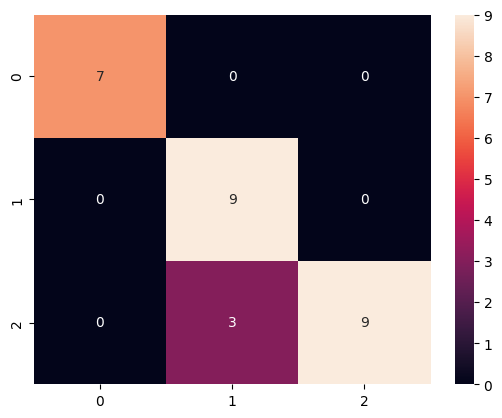

In [26]:
plot_confusion_matrix(y_test, y_preds)